# E-commerce Customer Spending Prediction Project
This project uses linear regression to predict the yearly amount spent by e-commerce customers based on demographic and behavioral data.

### Methodology
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Model Training (Linear Regression)
- Model Evaluation (R-squared, MAE, MSE, RMSE)
- Model Deployment

### Key Findings
- Strong positive correlation between Avg. Session Length and Yearly Amount Spent
- High R-squared score and low error metrics indicate good model performance

### Conclusion
This project demonstrates the use of linear regression to predict e-commerce customer spending habits. The results show a good performance of the model, indicating its potential use in real-world applications.

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
# load the Data
df=pd.read_csv('Ecommerce Customers')

## Preprocessing

In [8]:
# Display the first few rows of the DataFrame
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
# Count the number of missing values in each column
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [18]:
# Generate descriptive statistics for the DataFrame
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA

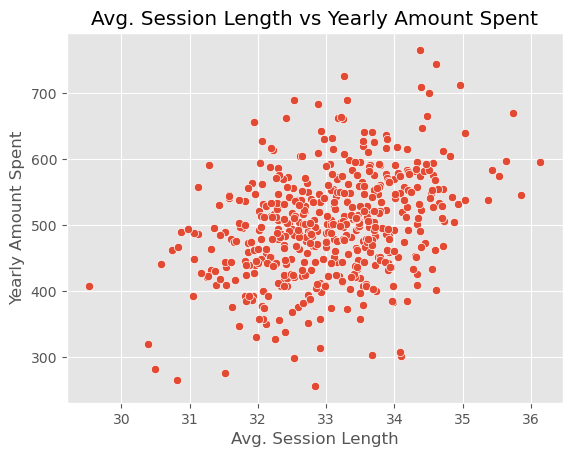

In [89]:
# Set the style of the plot to ggplot
plt.style.use('ggplot')
# Create a scatterplot of Avg. Session Length vs Yearly Amount Spent
sns.scatterplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df)
plt.title('Avg. Session Length vs Yearly Amount Spent')
plt.show()

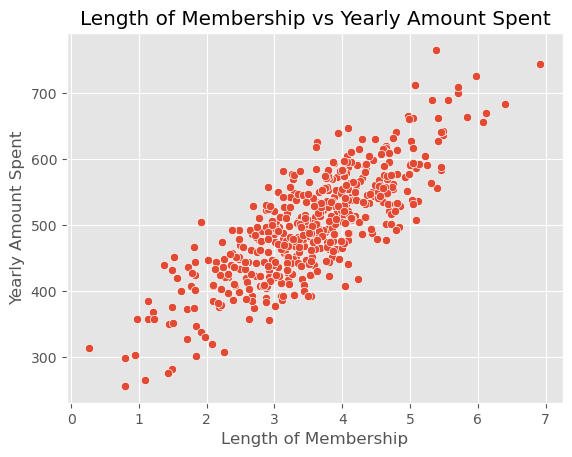

In [90]:
# Create a scatterplot of Length of Membership vs Yearly Amount Spent
sns.scatterplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()

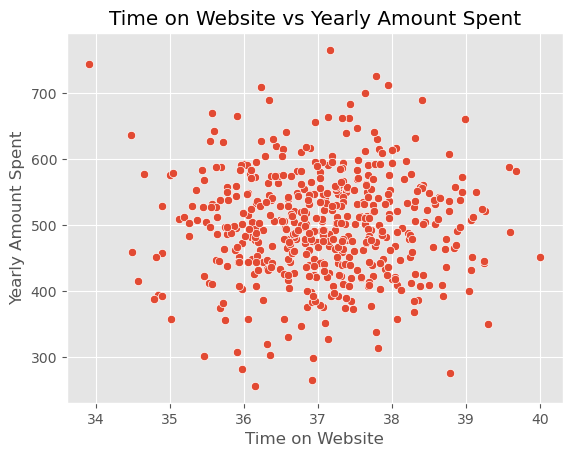

In [91]:
# Create a scatterplot of Time on Website vs Yearly Amount Spent
sns.scatterplot(x='Time on Website',y='Yearly Amount Spent',data=df)
plt.title('Time on Website vs Yearly Amount Spent')
plt.show()

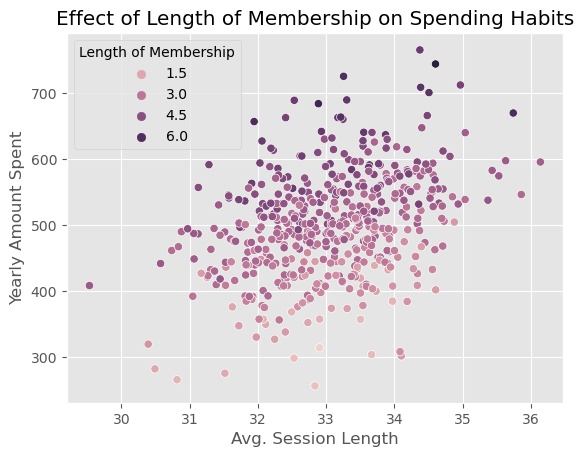

In [93]:
# Create a scatterplot of Avg. Session Length vs Yearly Amount Spent
# Color points by Length of Membership
sns.scatterplot(x='Avg. Session Length',y='Yearly Amount Spent',hue='Length of Membership',data=df)
plt.title('Effect of Length of Membership on Spending Habits')
plt.show()

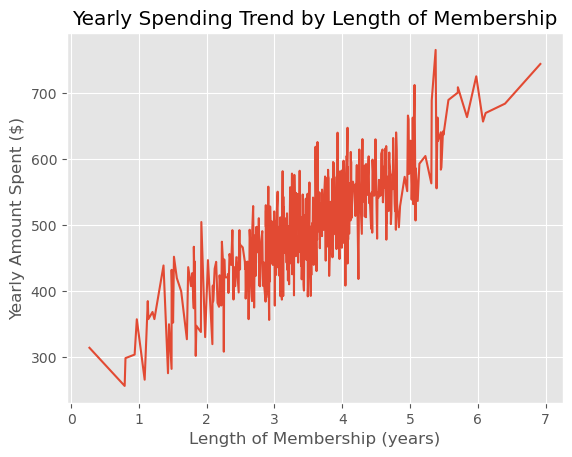

In [94]:
# Create a line plot of Yearly Amount Spent vs Length of Membership
sns.lineplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.title('Yearly Spending Trend by Length of Membership')
plt.xlabel('Length of Membership (years)')
plt.ylabel('Yearly Amount Spent ($)')
plt.show()


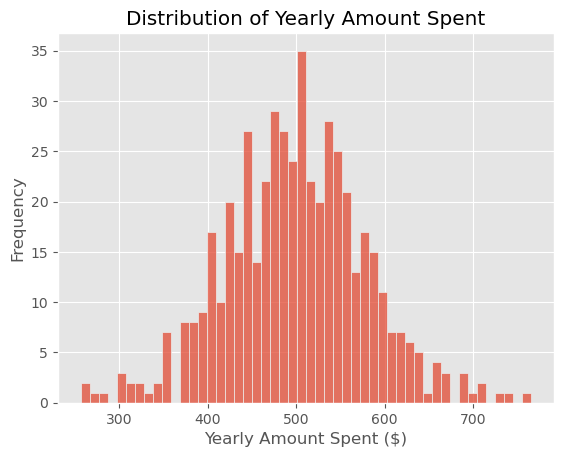

In [95]:
# Create a histogram of Yearly Amount Spent
sns.histplot(x='Yearly Amount Spent',data=df,bins=50)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent ($)')
plt.ylabel('Frequency')
plt.show()

D:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


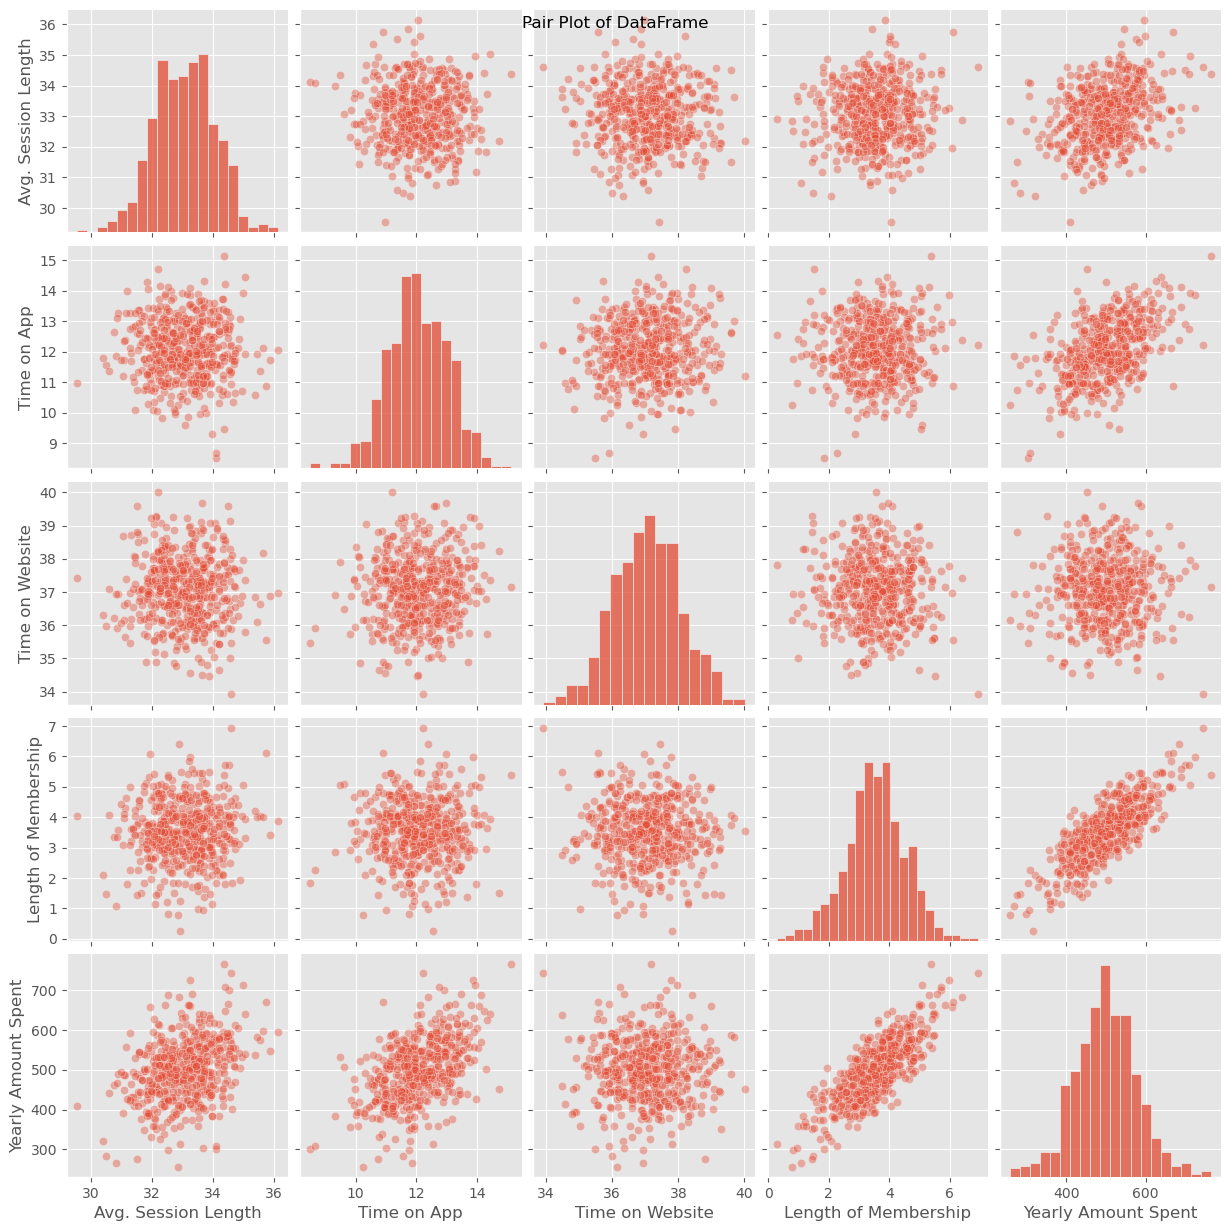

In [96]:
# Create a pair plot of the DataFrame
sns.pairplot(df,plot_kws={'alpha':0.4})
plt.suptitle('Pair Plot of DataFrame')
plt.show()

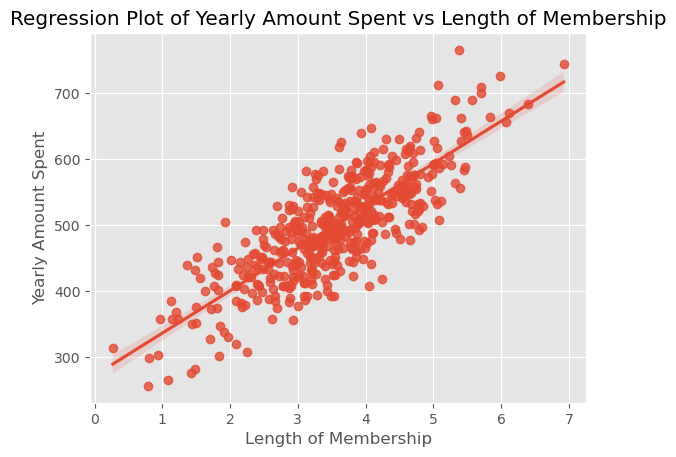

In [97]:
# Create a regression plot of Yearly Amount Spent vs Length of Membership
sns.regplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.title('Regression Plot of Yearly Amount Spent vs Length of Membership')
plt.show()

In [35]:
# Select only the numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_cols.corr()
corr_matrix

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


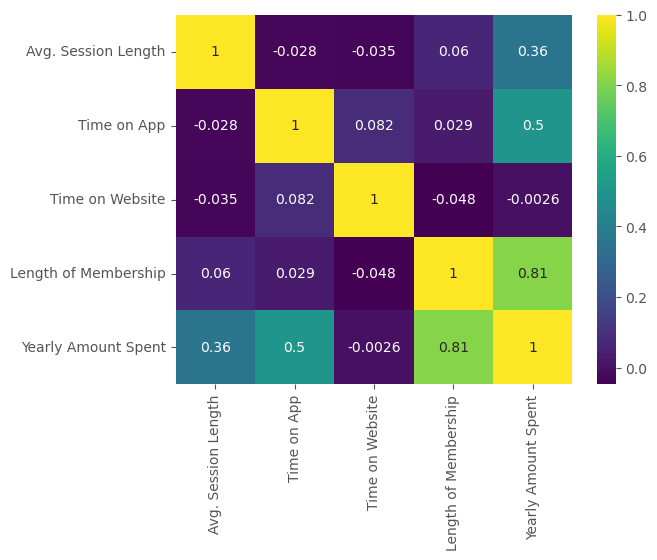

In [36]:
# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix,annot=True,cmap='viridis')
# seaborn's heatmap function creates a 2D representation of the correlation matrix
# annot=True adds numerical annotations to each cell in the heatmap
# cmap='viridis' sets the color scheme of the heatmap to viridis

plt.show()

## Model Training

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Email','Address','Avatar','Yearly Amount Spent'])
                                               ,df['Yearly Amount Spent'],test_size=0.2,random_state=1)

In [41]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
238,31.260647,13.266760,36.971195,2.267251
438,32.149061,10.047315,37.181447,3.535088
475,33.811733,11.186809,36.298893,4.301996
58,32.843930,11.832286,36.814011,3.471919
380,33.385990,12.782172,35.550772,3.228718
...,...,...,...,...
255,33.136655,13.891313,39.220713,2.907095
72,32.386252,10.674653,38.006583,3.401522
396,35.742670,10.889828,35.565436,6.115199
235,33.177205,11.622777,35.968896,3.634094


In [43]:
# Create a Linear Regression model
lr=LinearRegression()

In [44]:
# Train the Linear Regression model on the training data
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
# Get the coefficients of the Linear Regression model
lr.coef_

array([25.78854257, 38.85150472,  0.25638467, 61.49204989])

In [45]:
# Use the trained Linear Regression model to make predictions on the testing data
y_pred=lr.predict(x_test)

In [46]:
# Calculate the R-squared score of the model
r2_score(y_test,y_pred)

0.9892888134002329

## Model Evaluation

In [88]:
#  Calculate the Mean Absolute Error (MAE)
print('Mean Absolute Error: ',np.round(mean_absolute_error(y_test,y_pred),2))

# Calculate the Mean Squared Error (MSE)
print('Mean Squared Error: ',np.round(mean_squared_error(y_test,y_pred),2))

# Calculate the Root Mean Squared Error (RMSE)
print('Root Mean Squared Error: ',np.round(math.sqrt(mean_squared_error(y_test,y_pred)),2))

Mean Absolute Error:  6.82
Mean Squared Error:  78.3
Root Mean Squared Error:  8.85


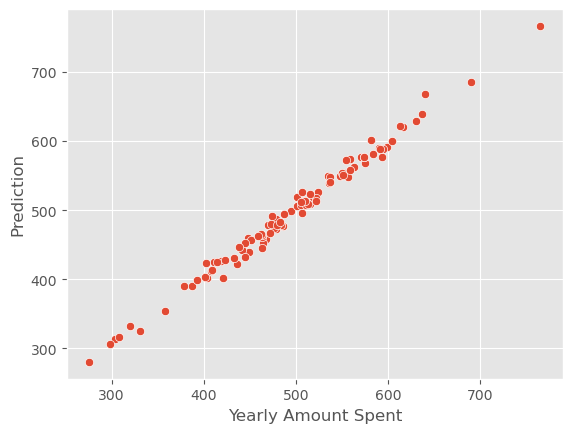

In [55]:
# Create a scatter plot of the actual values versus the predicted values
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Prediction')
plt.show()

## Training Model with OLS method

In [74]:
# Import the OLS (Ordinary Least Squares) class from the statsmodels library
from statsmodels.regression.linear_model import OLS

In [75]:
# Create an OLS model with the training data
pred=OLS(y_train,x_train).fit()

In [76]:
# Print a summary of the OLS model
print(pred.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.863e+04
Date:                 Sun, 28 Jul 2024   Prob (F-statistic):                        0.00
Time:                         06:49:25   Log-Likelihood:                         -1818.8
No. Observations:                  400   AIC:                                      3646.
Df Residuals:                      396   BIC:                                      3661.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Residuals

In [77]:
# Calculate the residuals
residual=y_test-y_pred

C:\Users\Abdurehman\AppData\Local\Temp\ipykernel_12252\1156586576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=30)


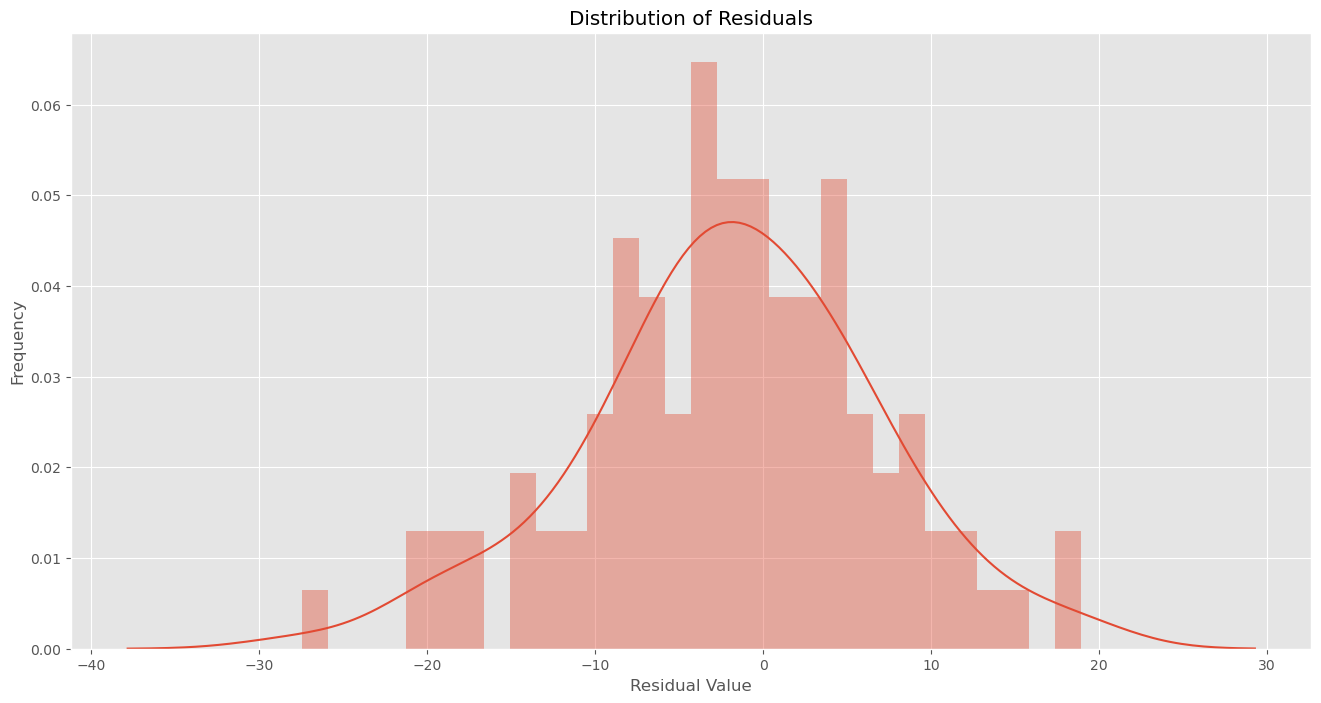

In [98]:
# Plot the distribution of the residuals
plt.figure(figsize=(16,8))
sns.distplot(residual,bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

In [82]:
# Import the stats module from the scipy library
import scipy.stats as stat


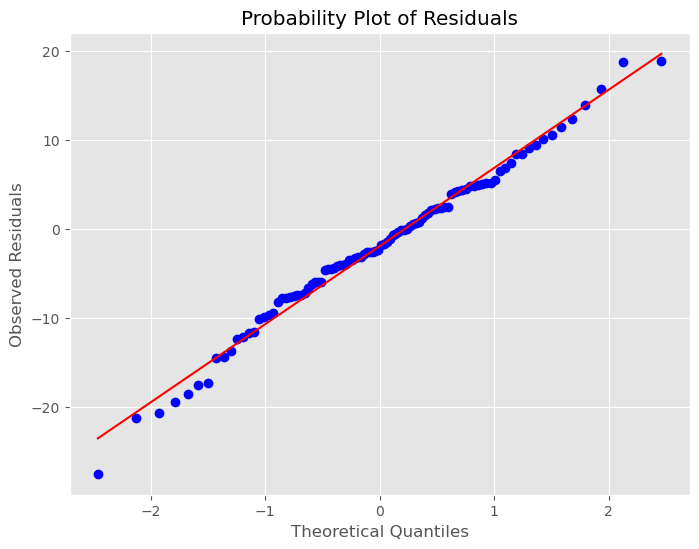

In [100]:
plt.figure(figsize=(8,6))
stat.probplot(residual,dist='norm',plot=plt)
plt.title('Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Residuals')
plt.show()

In [85]:
# Import the pickle module for serializing and deserializing Python objects
import pickle 

In [87]:
# Serialize the logistic regression model and save it to a file
pickle.dump(lr,open('e_commerce_prediction.pkl','wb'))

## Make Prediction on new Data

In [103]:
new_data=pd.DataFrame({'Avg. Session Length':[37.234321],
                       'Time on App':[17.342456],
                       'Time on Website':[31.345232],
                       'Length of Membership': [4.532651]})

In [105]:
lr.predict(new_data)

array([873.01861669])